In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [ ]:
class TumorDataset(Dataset):
    def __init__(self, transform = None):
        self.image_paths = []
        self.labels = dict()
        self.transform = transform
        for filename in os.listdir('drive/MyDrive/brain_tumor_dataset/yes'):
            path = os.path.join('drive/MyDrive/brain_tumor_dataset/yes', filename)
            self.image_paths.append(path)
            self.labels[path] = 1
        for filename in os.listdir('drive/MyDrive/brain_tumor_dataset/no'):
            path = os.path.join('drive/MyDrive/brain_tumor_dataset/no', filename)
            self.image_paths.append(path)
            self.labels[path] = 0

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = self.image_paths[idx]
        img = Image.open(img_name).convert('RGB')

        if self.transform:
            img = self.transform(img)

        return img, self.labels[img_name]

transform = transforms.Compose([
    transforms.Resize([256, 256]),
    transforms.ToTensor()
])

In [ ]:
data = TumorDataset(transform)
train_data_size = int(len(data) * .9)
all_train_data, test_data = random_split(data, [train_data_size, len(data) - train_data_size])
train_data_size = int(len(all_train_data) * .7)
train_data, val_data = random_split(all_train_data, [train_data_size, len(all_train_data) - train_data_size])
print(len(train_data), len(val_data), len(test_data))

batch_size = 96
train_dataloader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
val_dataloader = DataLoader(val_data, batch_size = batch_size, shuffle = False)
test_dataloader = DataLoader(test_data, batch_size = batch_size, shuffle = False)

158 69 26


In [ ]:
lr = .0000075
epochs = 25

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16(pretrained=True)
model.classifier[-1] = nn.Linear(4096, 2)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay = .01)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_loss = []
val_loss = []

for epoch in range(epochs):
    train_loss_local = []
    val_loss_local = []
    model.train()
    for imgs, labels in tqdm(train_dataloader):
        optimizer.zero_grad()
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model.forward(imgs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss_local.append(loss.item())
    model.eval()
    with torch.no_grad():
        for imgs, labels in tqdm(val_dataloader):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model.forward(imgs)
            loss = loss_fn(outputs, labels)
            val_loss_local.append(loss.item())

    train_loss.append(sum(train_loss_local) / len(train_loss_local))
    val_loss.append(sum(val_loss_local) / len(val_loss_local))

    print(f"Epoch: {epoch}, Train Loss: {train_loss[len(train_loss) - 1]}, Val Loss: {val_loss[len(val_loss) - 1]}")

100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


Epoch: 0, Train Loss: 0.7595130801200867, Val Loss: 0.7027631998062134


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch: 1, Train Loss: 0.7191849946975708, Val Loss: 0.6812461018562317


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch: 2, Train Loss: 0.6634305119514465, Val Loss: 0.6684886813163757


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Epoch: 3, Train Loss: 0.6194320917129517, Val Loss: 0.6534652709960938


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch: 4, Train Loss: 0.5702952146530151, Val Loss: 0.6321372389793396


100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


Epoch: 5, Train Loss: 0.5574856400489807, Val Loss: 0.6106242537498474


100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


Epoch: 6, Train Loss: 0.5656512677669525, Val Loss: 0.5883537530899048


100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


Epoch: 7, Train Loss: 0.5217317044734955, Val Loss: 0.5677267909049988


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


Epoch: 8, Train Loss: 0.5081153959035873, Val Loss: 0.5440857410430908


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch: 9, Train Loss: 0.4848317354917526, Val Loss: 0.5209615230560303


100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Epoch: 10, Train Loss: 0.4301844388246536, Val Loss: 0.5004360675811768


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch: 11, Train Loss: 0.42963823676109314, Val Loss: 0.4851580560207367


100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


Epoch: 12, Train Loss: 0.3921685069799423, Val Loss: 0.46508511900901794


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch: 13, Train Loss: 0.3528352677822113, Val Loss: 0.43788132071495056


100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Epoch: 14, Train Loss: 0.33480845391750336, Val Loss: 0.4084666669368744


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch: 15, Train Loss: 0.3066081404685974, Val Loss: 0.38103896379470825


100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


Epoch: 16, Train Loss: 0.2861078083515167, Val Loss: 0.3574126362800598


100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Epoch: 17, Train Loss: 0.2547494024038315, Val Loss: 0.3422596752643585


100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Epoch: 18, Train Loss: 0.2375900000333786, Val Loss: 0.34461861848831177


100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Epoch: 19, Train Loss: 0.21390663087368011, Val Loss: 0.3356092870235443


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Epoch: 20, Train Loss: 0.1810668557882309, Val Loss: 0.3018624484539032


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Epoch: 21, Train Loss: 0.16333866864442825, Val Loss: 0.30608075857162476


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Epoch: 22, Train Loss: 0.13182955980300903, Val Loss: 0.30757418274879456


100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


Epoch: 23, Train Loss: 0.11317092552781105, Val Loss: 0.2996508479118347


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

Epoch: 24, Train Loss: 0.08465344831347466, Val Loss: 0.3053266406059265


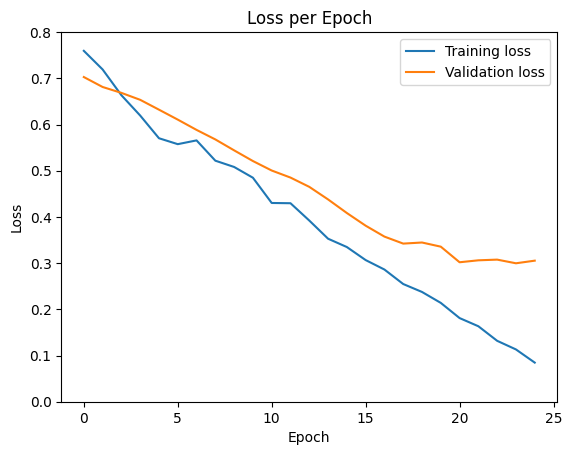

In [ ]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, .8])
plt.show()

In [ ]:
tp, tn, fp, fn = 0, 0, 0, 0
with torch.no_grad():
    for idx, batch in enumerate(test_dataloader):
        imgs, labels = batch
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        predictions = torch.argmax(outputs, dim=1)

        tp += ((predictions == 1) & (labels == 1)).sum().item()
        tn += ((predictions == 0) & (labels == 0)).sum().item()
        fp += ((predictions == 1) & (labels == 0)).sum().item()
        fn += ((predictions == 0) & (labels == 1)).sum().item()

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
accuracy = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) > 0 else 0

print("Precision:", precision, "Recall:", recall, "Accuracy:", accuracy)


Precision: 0.9523809523809523 Recall: 1.0 Accuracy: 0.9615384615384616


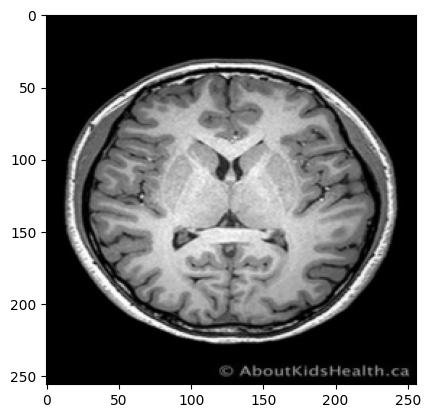

Prediction: tensor(0) Actual: tensor(0)


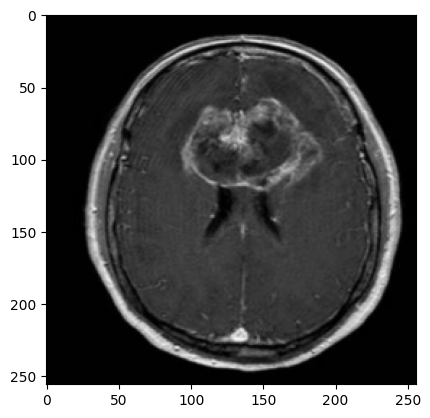

Prediction: tensor(1) Actual: tensor(1)


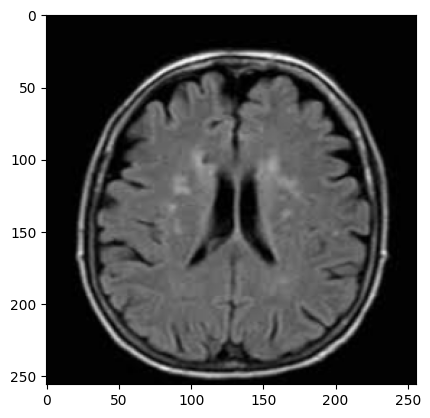

Prediction: tensor(0) Actual: tensor(0)


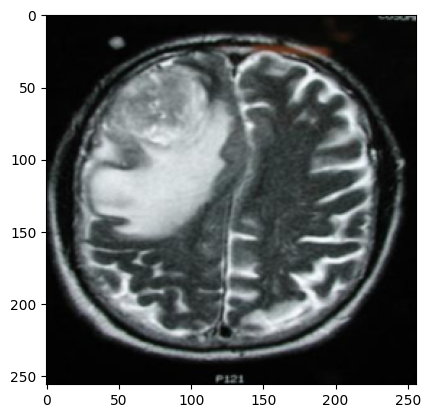

Prediction: tensor(1) Actual: tensor(1)


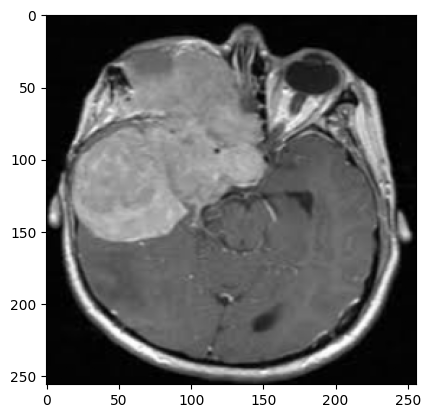

Prediction: tensor(1) Actual: tensor(1)


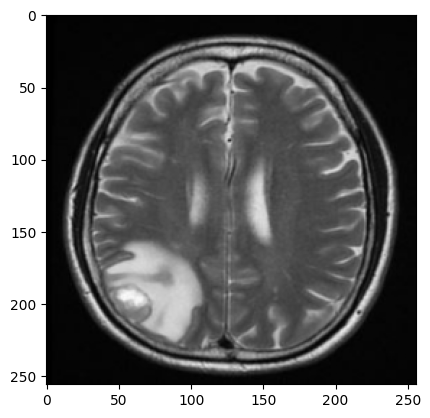

Prediction: tensor(1) Actual: tensor(1)


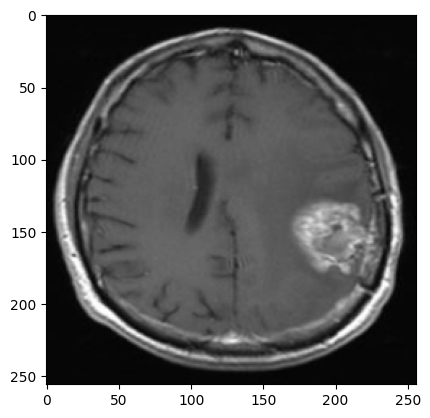

Prediction: tensor(1) Actual: tensor(1)


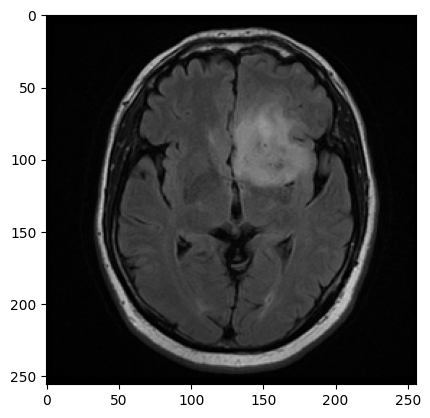

Prediction: tensor(1) Actual: tensor(1)


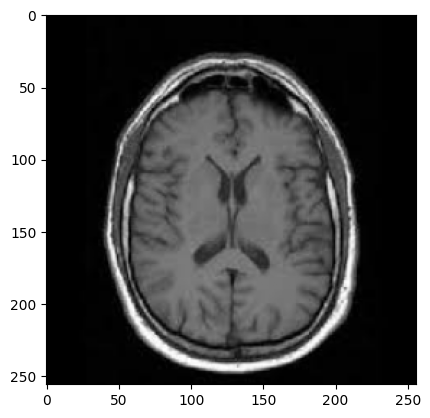

Prediction: tensor(0) Actual: tensor(0)


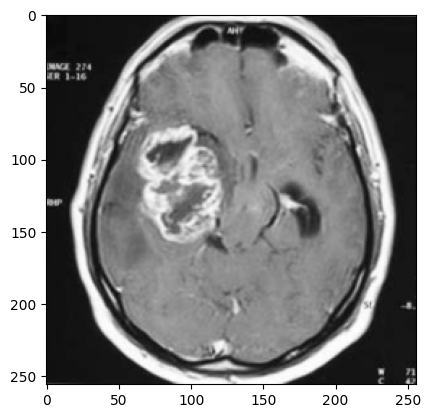

Prediction: tensor(1) Actual: tensor(1)


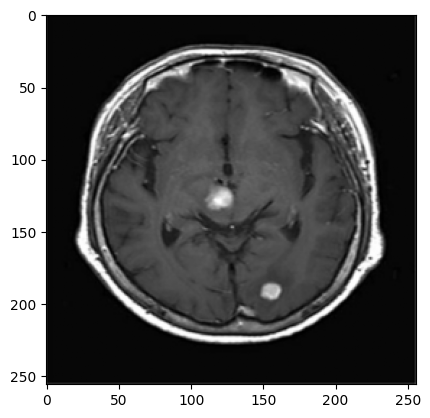

Prediction: tensor(1) Actual: tensor(0)


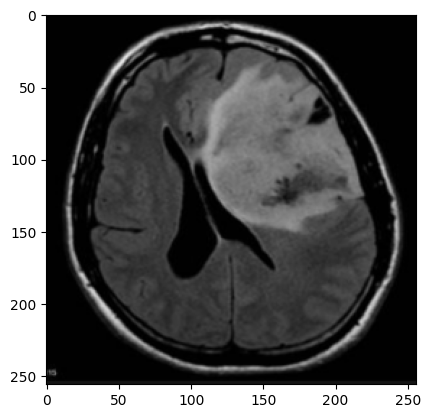

Prediction: tensor(1) Actual: tensor(1)


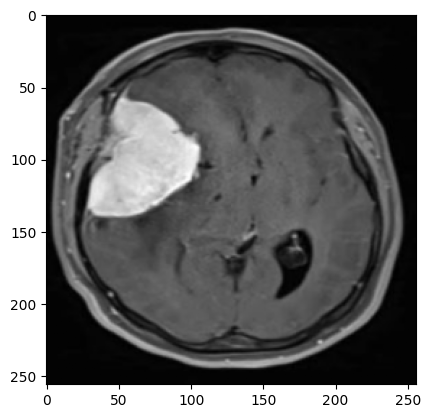

Prediction: tensor(1) Actual: tensor(1)


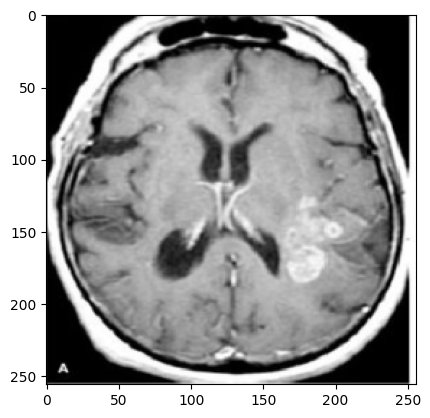

Prediction: tensor(1) Actual: tensor(1)


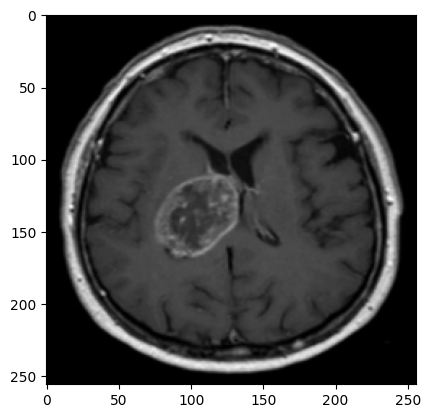

Prediction: tensor(1) Actual: tensor(1)


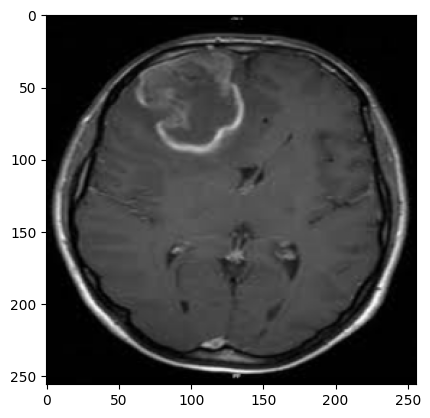

Prediction: tensor(1) Actual: tensor(1)


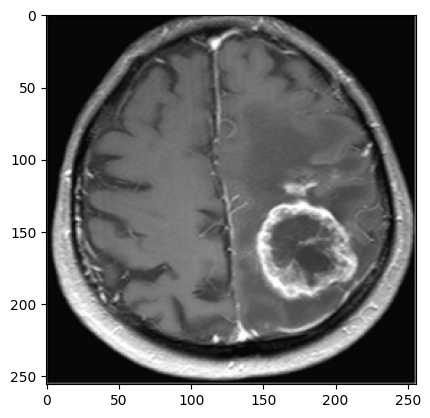

Prediction: tensor(1) Actual: tensor(1)


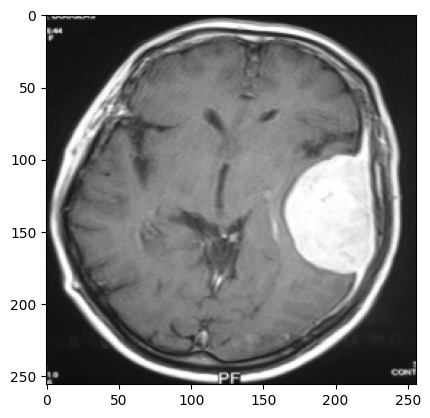

Prediction: tensor(1) Actual: tensor(1)


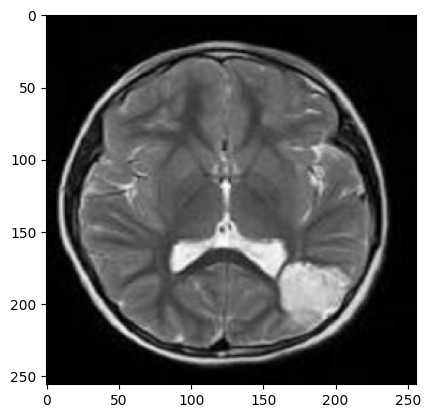

Prediction: tensor(1) Actual: tensor(1)


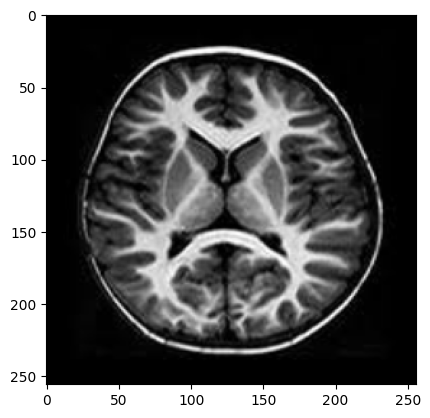

Prediction: tensor(0) Actual: tensor(0)


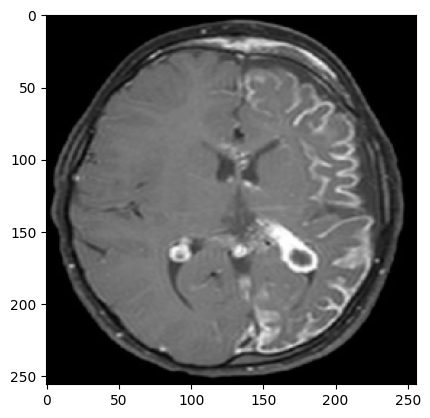

Prediction: tensor(1) Actual: tensor(1)


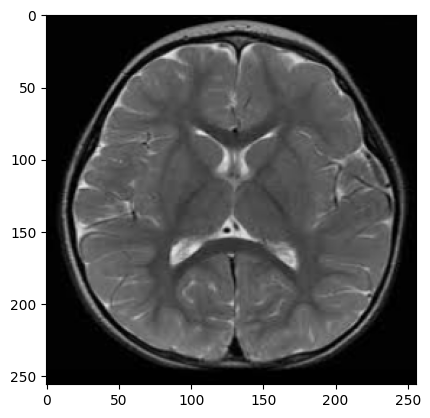

Prediction: tensor(0) Actual: tensor(0)


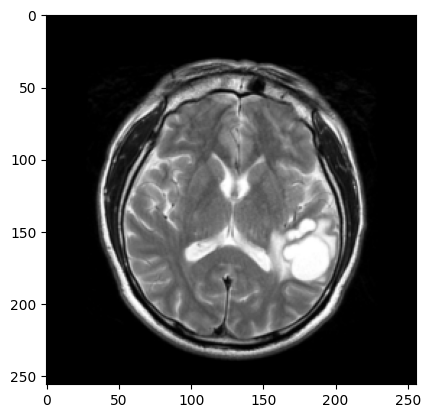

Prediction: tensor(1) Actual: tensor(1)


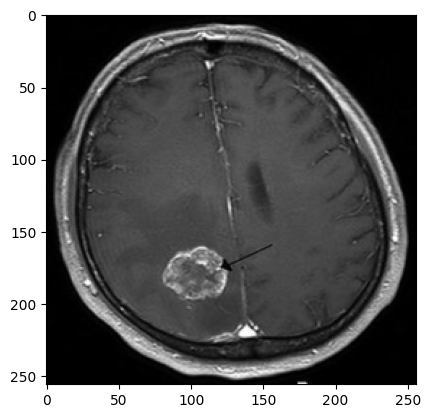

Prediction: tensor(1) Actual: tensor(1)


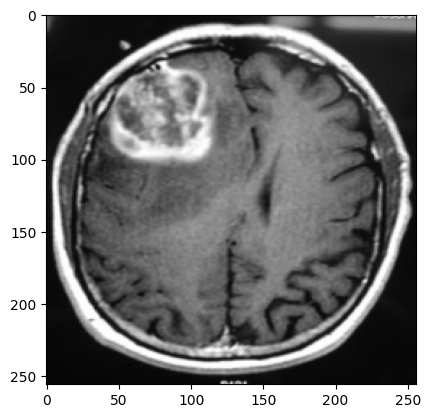

Prediction: tensor(1) Actual: tensor(1)


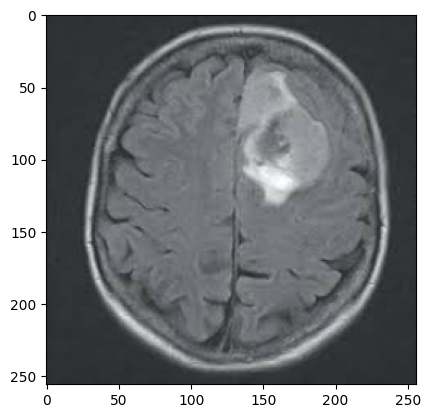

Prediction: tensor(1) Actual: tensor(1)


In [ ]:
batch = next(iter(test_dataloader))
imgs, labels = batch
model = model.to('cpu')
outputs = torch.argmax(model.forward(imgs), dim = 1)

for i in range(len(imgs)):
  plt.imshow(imgs[i].permute(1, 2, 0))
  plt.show()
  print("Prediction:", outputs[i], "Actual:", labels[i])